In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay


In [ ]:
complaints = pd.read_csv('complaints_25Nov21.csv')

In [ ]:
complaints.shape

(207260, 18)

In [ ]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
complaints['Company'].value_counts().sort_values(ascending=False)

BANK OF AMERICA, NATIONAL ASSOCIATION    65440
WELLS FARGO & COMPANY                    53111
JPMORGAN CHASE & CO.                     42170
CITIBANK, N.A.                           34341
U.S. BANCORP                             12198
Name: Company, dtype: int64

In [ ]:
complaints.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453


In [ ]:
complaints['Consumer disputed?'].value_counts()

No     162357
Yes     44903
Name: Consumer disputed?, dtype: int64

In [ ]:
complaints['Consumer disputed?'].isna().sum()

0

In [ ]:
complaints['Consumer disputed?'] = complaints['Consumer disputed?'].astype('category')

In [ ]:
complaints['Consumer disputed?'].value_counts()

No     162357
Yes     44903
Name: Consumer disputed?, dtype: int64

In [ ]:
complaints['Consumer disputed?'].value_counts() / (complaints['Consumer disputed?'].value_counts().sum()) *100

No     78.334942
Yes    21.665058
Name: Consumer disputed?, dtype: float64

In [ ]:
complaints['Timely response?'].value_counts() / (complaints['Timely response?'].value_counts().sum()) *100

Yes    97.753064
No      2.246936
Name: Timely response?, dtype: float64

In [ ]:
a = (complaints['Company response to consumer'].value_counts().sum())

In [ ]:
complaints['Company response to consumer'].value_counts().sort_values(ascending=False) / a *100

Closed with explanation            71.856605
Closed with monetary relief        11.057609
Closed with non-monetary relief     9.169642
Closed without relief               5.364759
Closed with relief                  1.369777
Closed                              1.097173
Untimely response                   0.084435
Name: Company response to consumer, dtype: float64

In [ ]:
complaints['Issue'].value_counts().head(5) / (complaints['Timely response?'].value_counts().sum()) *100 

Loan modification,collection,foreclosure    28.437711
Loan servicing, payments, escrow account    12.837981
Account opening, closing, or management      9.534884
Deposits and withdrawals                     5.922513
Application, originator, mortgage broker     3.671234
Name: Issue, dtype: float64

In [ ]:
complaints['Sub-issue'].value_counts().head(5) / (complaints['Sub-issue'].value_counts().sum()) *100 

Not given enough info to verify debt    14.429303
Debt is not mine                        12.921620
Frequent or repeated calls              10.350826
Debt was paid                            7.664057
Attempted to collect wrong amount        4.764666
Name: Sub-issue, dtype: float64

In [ ]:
complaints['Product'].value_counts().head(5) / (complaints['Product'].value_counts().sum()) *100 

Mortgage                   49.059153
Bank account or service    21.515970
Credit card                20.356557
Debt collection             3.792821
Consumer Loan               2.657532
Name: Product, dtype: float64

In [ ]:
complaints['Sub-product'].value_counts().head(5) / (complaints['Sub-product'].value_counts().sum()) *100 

Other mortgage                            27.043746
Checking account                          19.410028
Conventional fixed mortgage               16.502785
FHA mortgage                               7.048008
Conventional adjustable mortgage (ARM)     6.064112
Name: Sub-product, dtype: float64

In [ ]:
Mortgage = complaints[(complaints['Product'] == 'Mortgage') & (complaints['Issue'])]

In [ ]:
Mortgage.Issue.value_counts().sort_values(ascending=False).head(5)

Loan modification,collection,foreclosure    58940
Loan servicing, payments, escrow account    26608
Application, originator, mortgage broker     7609
Settlement process and costs                 3685
Credit decision / Underwriting               2587
Name: Issue, dtype: int64

In [ ]:
Mortgage['Timely response?'].value_counts().sort_values(ascending=False)

Yes    100144
No       1536
Name: Timely response?, dtype: int64

In [ ]:
Mortgage['Consumer disputed?'].value_counts().sort_values(ascending=False)

No     78322
Yes    23358
Name: Consumer disputed?, dtype: int64

In [ ]:
complaints['Timely response?'].value_counts().sort_values(ascending=False).head(50)

Yes    202603
No       4657
Name: Timely response?, dtype: int64

In [ ]:
X = complaints[[ 'Product', 'Sub-product', 'Issue', 'Sub-issue',
        'Company public response', 'Company',
       'State',  'Tags',
       'Submitted via',  'Company response to consumer',
       'Timely response?']]

In [ ]:

print(len(X)) 
print(len(X.dropna()))  

207260
581


In [ ]:
X.isna().sum()

Product                              0
Sub-product                      43015
Issue                                0
Sub-issue                       196913
Company public response         148802
Company                              0
State                             2194
Tags                            178995
Submitted via                        0
Company response to consumer         0
Timely response?                     0
dtype: int64

In [ ]:
X['Sub-product'].unique()

array(['International money transfer', 'Other bank product/service',
       'Conventional fixed mortgage', 'Other mortgage',
       'Checking account', 'Vehicle lease', nan, 'Medical',
       'Conventional adjustable mortgage (ARM)', 'Vehicle loan',
       'Reverse mortgage', '(CD) Certificate of deposit', 'FHA mortgage',
       'Government benefit payment card', 'VA mortgage',
       'Savings account', 'Credit card',
       'Home equity loan or line of credit', 'Second mortgage',
       'Non-federal student loan', 'Installment loan',
       'Other special purpose card', 'Mortgage', 'I do not know',
       'Cashing a check without an account', 'Federal student loan',
       'Auto', 'Other (i.e. phone, health club, etc.)',
       'Personal line of credit', 'Domestic (US) money transfer',
       'General purpose card', 'Payday loan',
       'Traveler’s/Cashier’s checks', 'Refund anticipation check',
       'Federal student loan servicing', 'Debt settlement',
       'Gift or merchant card

In [ ]:
X['Sub-issue'].unique()

array([nan, 'Debt is not mine', 'Not given enough info to verify debt',
       'Frequent or repeated calls', 'Account status',
       'Trouble with how payments are handled',
       'Talked to a third party about my debt', 'Debt was paid',
       'Attempted to/Collected exempt funds',
       'Right to dispute notice not received',
       'Debt was discharged in bankruptcy',
       'Seized/Attempted to seize property', 'Account terms',
       'Indicated committed crime not paying',
       'Having problems with customer service',
       'Threatened to sue on too old debt',
       'Contacted employer after asked not to',
       "Can't decrease my monthly payments",
       'Attempted to collect wrong amount',
       "Don't agree with fees charged",
       'Qualify for a better loan than offered',
       "Indicated shouldn't respond to lawsuit",
       'Received bad information about my loan',
       'Not disclosed as an attempt to collect',
       "Can't temporarily postpone payments",
   

In [ ]:
X['State'].unique()

array([nan, 'PA', 'VA', 'GA', 'CA', 'MD', 'MN', 'WA', 'OK', 'TX', 'FL',
       'NJ', 'MA', 'WI', 'AZ', 'NY', 'DE', 'IL', 'CT', 'AE', 'MI', 'TN',
       'NH', 'MO', 'DC', 'OH', 'WV', 'NC', 'NM', 'AL', 'NV', 'UT', 'SC',
       'AK', 'KY', 'HI', 'OR', 'KS', 'CO', 'IN', 'ID', 'NE', 'VT', 'LA',
       'RI', 'WY', 'MS', 'ME', 'MT', 'IA', 'AR', 'PR', 'ND', 'SD', 'AS',
       'AP', 'GU', 'VI', 'MH', 'FM', 'AA', 'MP', 'PW'], dtype=object)

In [ ]:
X['Company public response'].unique()

array(['Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company chooses not to provide a public response', nan,
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company believes the complaint is the result of a misunderstanding'],
      dtype=object)

In [ ]:
X['Tags'].unique()

array([nan, 'Older American', 'Servicemember',
       'Older American, Servicemember'], dtype=object)

In [ ]:
X = X.fillna('missing')
X.dropna().shape

(207260, 11)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
print('X has the shape ',X.shape)

X

X has the shape  (207260, 306)


,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
207256,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
207257,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
207258,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
y = complaints['Consumer disputed?']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(complaints['Consumer disputed?'])
print(le.classes_)
print(le.inverse_transform(list(set(y))))
labels = dict(zip(list(set(y)), le.inverse_transform(list(set(y)))))
print("\nLabel mapping is:", labels)


['No' 'Yes']
['No' 'Yes']

Label mapping is: {0: 'No', 1: 'Yes'}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(165808, 306)
(165808,)
(41452, 306)
(41452,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [ ]:
y_train.sum()/len(y_train)

0.5

In [ ]:
X_train.shape

(71720, 306)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    35860
1    35860
dtype: int64

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(207260, 306)
(71720, 306)
(41452, 306)


In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(use_label_encoder=False)

In [ ]:
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.55      0.66     32409
           1       0.27      0.61      0.38      9043

    accuracy                           0.56     41452
   macro avg       0.55      0.58      0.52     41452
weighted avg       0.71      0.56      0.60     41452



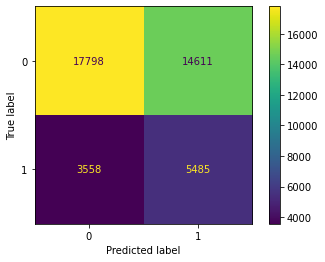

In [ ]:
print(classification_report(y_true = y_test, y_pred = pred))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
False_Positive_Cost = 90 * cm[0,1]
False_Negative_Cost = 1500 * cm[1,0]

In [ ]:
Total_cost = False_Positive_Cost + False_Negative_Cost
Total_cost

6651990

Confusion Matrix : 
 [[   61 32348]
 [    3  9040]]
Test accuracy =  0.21955514812313037
              precision    recall  f1-score   support

           0       0.95      0.00      0.00     32409
           1       0.22      1.00      0.36      9043

    accuracy                           0.22     41452
   macro avg       0.59      0.50      0.18     41452
weighted avg       0.79      0.22      0.08     41452



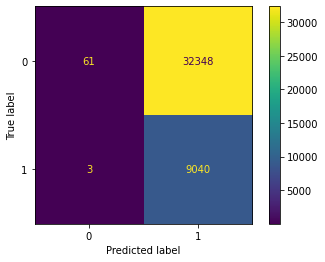

In [ ]:
threshold = 0.2
pred_prob = model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]
pred = (pred_prob>threshold).astype(int)
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred))

In [ ]:
pred_prob

array([0.49589643, 0.59923387, 0.44806793, ..., 0.52623284, 0.31887496,
       0.5043058 ], dtype=float32)

In [ ]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
False_Positive_Cost = 90 * cm[0,1]
False_Negative_Cost = 1500 * cm[1,0]

In [ ]:
Total_cost = False_Positive_Cost + False_Negative_Cost
Total_cost

2915820

In [ ]:
from sklearn import metrics
metrics.roc_auc_score(y_test, pred_prob)

0.6106066371425101

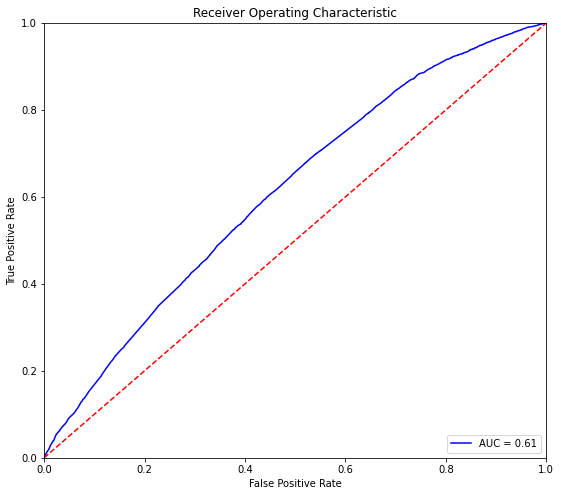

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

,TPR,FPR,Threshold
0,1.000000,1.000000,0.079735
1,1.000000,0.999815,0.082563
2,1.000000,0.999691,0.087260
3,1.000000,0.999568,0.089069
4,1.000000,0.999475,0.095478
...,...,...,...
3956,0.000442,0.000062,0.723176
3957,0.000221,0.000062,0.734948
3958,0.000221,0.000031,0.738339
3959,0.000000,0.000031,0.751704


In [ ]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True).to_excel('temp.xlsx')

In [ ]:
model = sm.Logit(y_train, X_train).fit(method='bfgs')
model.summary()

         Current function value: 0.673466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                71720
Model:                          Logit   Df Residuals:                    71459
Method:                           MLE   Df Model:                          260
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.02839
Time:                        23:28:20   Log-Likelihood:                -48301.
converged:                      False   LL-Null:                       -49713.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================================================================================================================
                                                                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Product_Bank account or service                                                                                                                    -0.0263        nan        nan        nan         nan         nan
Product_Consumer Loan                                                                                                                               0.0049        nan        nan        nan         nan         nan
Product_Credit card                                                                                                                                 0.0522        nan        nan        nan         nan         nan
Product_Credit reporting                                                                                                                           -0.0682        nan        nan        nan         nan         nan
Product_Debt collection                                                                                                                            -0.1847        nan        nan        nan         nan         nan
Product_Money transfers                                                                                                                             0.0616        nan        nan        nan         nan         nan
Product_Mortgage                                                                                                                                   -0.0466        nan        nan        nan         nan         nan
Product_Other financial service                                                                                                                     0.0269        nan        nan        nan         nan         nan
Product_Payday loan                                                                                                                                -0.0194        nan        nan        nan         nan         nan
Product_Prepaid card                                                                                                                               -0.0579        nan        nan        nan         nan         nan
Product_Student loan                                                                                                                               -0.0555        nan        nan        nan         nan         nan
Sub-product_(CD) Certificate of deposit                                                                                                             0.1437        nan        nan        nan         nan         nan
Sub-product_Auto                                             

In [ ]:
threshold = 0.2

In [ ]:
pred_prob = model.predict(X_test)
pred = (pred_prob>threshold).astype(int)
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, pred))

Confusion Matrix : 
 [[   96 32313]
 [    9  9034]]
Test accuracy =  0.2202547524848017


In [ ]:
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,96,32313
Actual 1,9,9034


In [ ]:
print(classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.91      0.00      0.01     32409
           1       0.22      1.00      0.36      9043

    accuracy                           0.22     41452
   macro avg       0.57      0.50      0.18     41452
weighted avg       0.76      0.22      0.08     41452



In [ ]:
pred_prob

13630     0.514042
96571     0.621302
111811    0.461049
22456     0.462151
58550     0.537390
            ...   
200635    0.444305
118238    0.486549
62024     0.559628
18906     0.296393
78730     0.575096
Length: 41452, dtype: float64

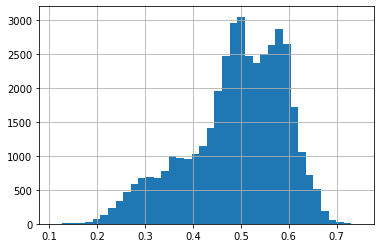

In [ ]:
pred_prob.hist(bins=40)

In [ ]:
metrics.roc_auc_score(y_test, pred_prob)

0.6044501685163169

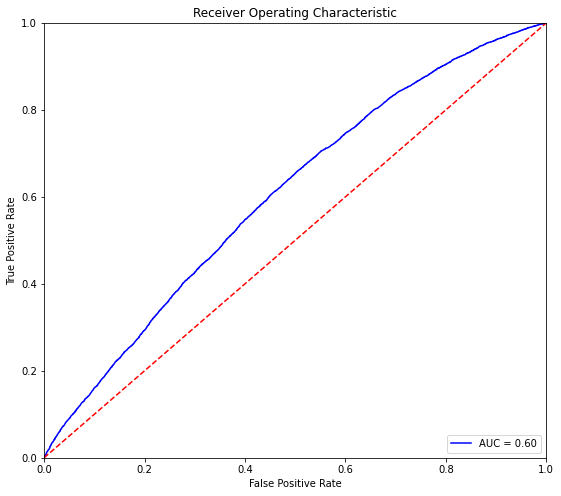

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()